In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import os

import color_scheme
import gene_model

base_dir = os.path.join("..", "data", "minimal_num_sites")

C:\Users\Jules\AppData\Local\Temp\ipykernel_21424\1390565722.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
rho = 1
steps = 100
gc_range = range(steps, int(10e6), steps)

theta = 500
p_500 = [gene_model.double_gain_probability(theta, rho, g) for g in gc_range]

theta = 1000
p_1000 = [gene_model.double_gain_probability(theta, rho, g) for g in gc_range]

theta = 5000
p_5000 = [gene_model.double_gain_probability(theta, rho, g) for g in gc_range]

theta = 2500
p_2500 = [gene_model.double_gain_probability(theta, rho, g) for g in gc_range]

theta = 5000
rho = 2
p_2502 = [gene_model.double_gain_probability(theta, rho, g) for g in gc_range]



Text(0.5, 1.0, 'Probaility that at least one of the sites is hit by a double gene gain event.')

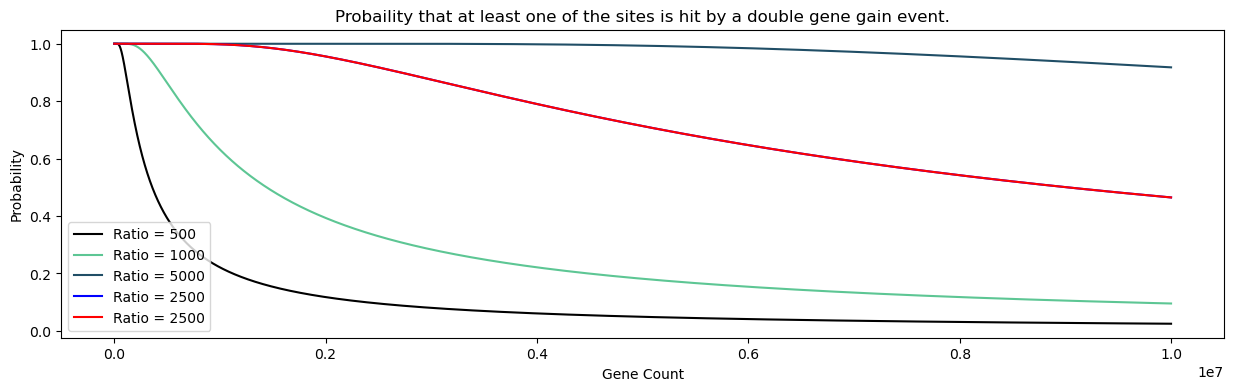

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(gc_range, p_500, color="black", label="Ratio = 500")
ax.plot(gc_range, p_1000, color=color_scheme.primary, label="Ratio = 1000")
ax.plot(gc_range, p_5000, color=color_scheme.secondary, label="Ratio = 5000")
ax.plot(gc_range, p_2500, color="blue", label="Ratio = 2500")
ax.plot(gc_range, p_2502, color="red", label="Ratio = 2500")


ax.set_xlabel("Number of Sites")
ax.set_ylabel("Probability")
plt.legend()
plt.title("Probaility that at least one of the sites is hit by a double gene gain event.")

In [4]:
rho = 1

theta_steps = 25
theta_range = list(reversed(range(0, 5000 + theta_steps, theta_steps)))
print(len(theta_range))

gc_steps = 50000
gc_range = list(range(0, int(10e6) + gc_steps, gc_steps))
print(len(gc_range))

matrix = np.zeros((len(theta_range), len(gc_range) -1))
for i, theta in enumerate(theta_range):
    for j, gc in enumerate(gc_range[1:]):
        matrix[i, j] = gene_model.double_gain_probability(theta, rho, gc)

201
201


In [5]:
matrix

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        9.19757664e-01, 9.18734999e-01, 9.17709712e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        9.17713865e-01, 9.16675668e-01, 9.15634941e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        9.15628631e-01, 9.14574853e-01, 9.13518638e-01],
       ...,
       [4.86756140e-02, 2.46657262e-02, 1.65176250e-02, ...,
        2.52491121e-04, 2.51221646e-04, 2.49966553e-04],
       [1.24098655e-02, 6.22740520e-03, 4.15661544e-03, ...,
        6.31293074e-05, 6.28118814e-05, 6.24980521e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

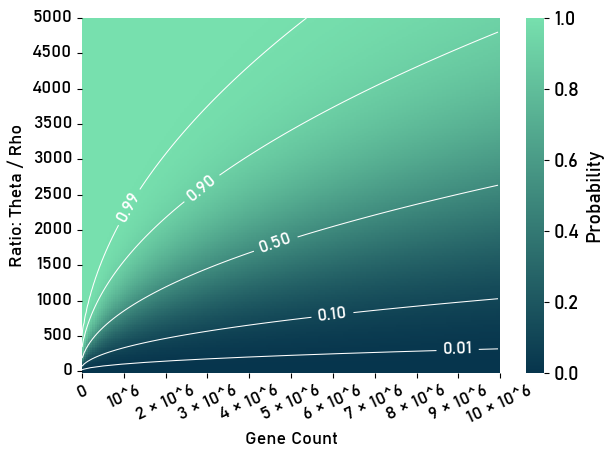

In [10]:
fig, ax = plt.subplots()
plt.rcParams["font.family"] = "Bahnschrift"
plt.rcParams["font.size"] = "14"
plt.rcParams["font.weight"] = "ultralight"


sns.heatmap(matrix,
            robust=False,
            square=False,
            cmap=color_scheme.cmap,
            cbar_kws={'label': 'Probability'},
            ax=ax,)

n = 20
ax.set_xticks(np.arange(0, len(gc_range), n))

xticks_labels = [str(gc)[:-6]  + " × 10^6" for gc in gc_range[::n]]
xticks_labels[0] = "0"
xticks_labels[1] = "10^6"

ax.set_xticklabels(xticks_labels)
ax.tick_params(axis='x', labelrotation=25)

n = 20
ax.set_yticks(np.arange(0, len(theta_range), n))
ax.set_yticklabels(theta_range[::n]) 

ax.set(xlabel="Number of Sites", ylabel="Ratio: Theta / Rho");

levels = [0.01, 0.1, 0.5, 0.9, 0.99]
locations = [(180, 200), (120, 170), (90, 120), (60, 100), (10, 100)]
CS = plt.contour(matrix, levels=levels, colors='white', linewidths=0.75)


# Label the contour lines
plt.clabel(CS, inline=True, fontsize=13, manual=locations)
plt.tight_layout()

plt.savefig(os.path.join(base_dir, f"double_proba.svg"))
plt.savefig(os.path.join(base_dir, f"double_proba.pdf"))